In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка датасета
df = pd.read_csv('train.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13132\3748576648.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [3]:
# Исследование датасета
# Посмотрим на первые несколько строк датасета
print(df.head())

# Посмотрим на общую информацию о датасете
print(df.info())

# Посмотрим на описательную статистику числовых данных
print(df.describe())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [4]:
# Определение наличия пропущенных значений
missing_values = df.isnull().sum()
print("Пропущенные значения в каждом столбце:")
print(missing_values)
# Проверьте на содержвание символа "_" 
# Удаление символа '_' из значений ячеек в DataFrame
df = df.replace('_', '', regex=True)

# Проверка наличия символа '_' в ячейках DataFrame
cells_with_underscore = df.applymap(lambda x: '_' in str(x))

# Вывод информации о ячейках с символом '_'
print("Ячейки с символом '_':")
print(cells_with_underscore)


# Выведем информацию о DataFrame после выполнения операций
print(df.info())

# Возможно некоторые стоблцы должны иметь числовое значение, но они имеют строковые значения. Обработайте
cols_to_convert = ['Age']  # Замените на реальные названия столбцов
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Если посчитаете нужным , можете удалить некоторые стоблцы. 

Пропущенные значения в каждом столбце:
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: in

C:\Users\Asus\AppData\Local\Temp\ipykernel_13132\1168416614.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cells_with_underscore = df.applymap(lambda x: '_' in str(x))


Ячейки с символом '_':
          ID  Customer_ID  Month   Name    Age    SSN  Occupation  \
0      False        False  False  False  False  False       False   
1      False        False  False  False  False  False       False   
2      False        False  False  False  False  False       False   
3      False        False  False  False  False  False       False   
4      False        False  False  False  False  False       False   
...      ...          ...    ...    ...    ...    ...         ...   
99995  False        False  False  False  False  False       False   
99996  False        False  False  False  False  False       False   
99997  False        False  False  False  False  False       False   
99998  False        False  False  False  False  False       False   
99999  False        False  False  False  False  False       False   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0              False                  False              False  ...   
1     

In [5]:
# Замена некорректных значений в столбце 'Age' на пустую строку
df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = ''

# Выведем информацию о DataFrame после замены
print(df.head())



       ID Customer_ID     Month           Name Age          SSN Occupation  \
0  0x1602    CUS0xd40   January  Aaron Maashoh  23  821-00-0265  Scientist   
1  0x1603    CUS0xd40  February  Aaron Maashoh  23  821-00-0265  Scientist   
2  0x1604    CUS0xd40     March  Aaron Maashoh      821-00-0265  Scientist   
3  0x1605    CUS0xd40     April  Aaron Maashoh  23  821-00-0265  Scientist   
4  0x1606    CUS0xd40       May  Aaron Maashoh  23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...               
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_Histor

C:\Users\Asus\AppData\Local\Temp\ipykernel_13132\2425954402.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = ''


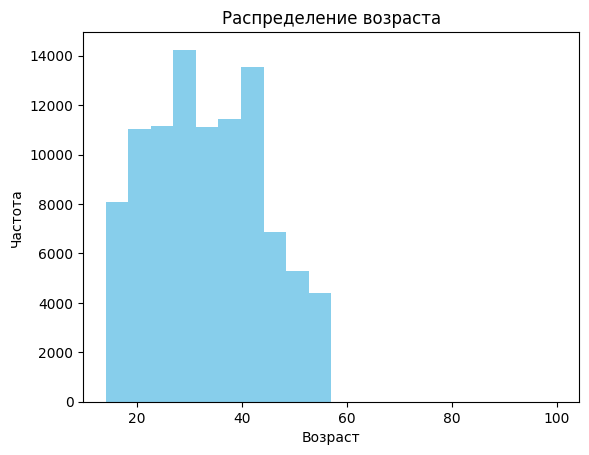

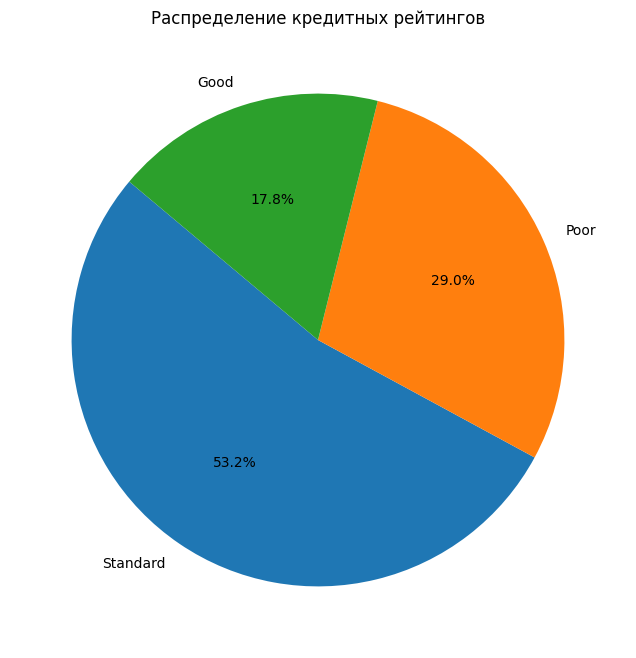

In [6]:
# Визуализация данных 
# Удаление строк с пустыми значениями в столбце 'Age'
df = df[df['Age'] != '']

# Преобразование столбца 'Age' в числовой формат
df['Age'] = pd.to_numeric(df['Age'])

# Визуализация данных
plt.hist(df['Age'], bins=20, color='skyblue')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста')
plt.show()

# Подсчет количества уникальных значений в столбце 'Credit_Score'
credit_score_counts = df['Credit_Score'].value_counts()

# Визуализация данных в круговой диаграмме
plt.figure(figsize=(8, 8))
plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение кредитных рейтингов')
plt.show()



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Удаление всех NaN значений из DataFrame
df.dropna(inplace=True)

# Подготовка данных
X = df[['Annual_Income', 'Num_of_Delayed_Payment', 'Delay_from_due_date','Interest_Rate','Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Num_Credit_Inquiries']]
y = df['Credit_Score']  

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Оценка производительности моделей на тестовом наборе
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy Logistic Regression:", accuracy_log_reg)

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Decision Tree:", accuracy_dt)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest:", accuracy_rf)


Accuracy Logistic Regression: 0.5196896217264791
Accuracy Decision Tree: 0.7026188166828322
Accuracy Random Forest: 0.7475266731328807


In [18]:
# Предсказание на тестовом наборе (например, accuracy, precision, recall, F1-score).
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Предсказание на тестовом наборе для каждой модели
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Вычисление метрик для каждой модели
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Вывод метрик для каждой модели
print("Logistic Regression:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1-score:", f1_log_reg)
print()

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print()

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


C:\Users\Asus\PycharmProjects\bigDataLabs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression:
Accuracy: 0.5196896217264791
Precision: 0.5893938936161902
Recall: 0.5196896217264791
F1-score: 0.35596942372012147

Decision Tree:
Accuracy: 0.7026188166828322
Precision: 0.7049907771913813
Recall: 0.7026188166828322
F1-score: 0.7033168922133101

Random Forest:
Accuracy: 0.7475266731328807
Precision: 0.7467279375611359
Recall: 0.7475266731328807
F1-score: 0.7468484370774912


# Проанализируйте результаты и сделайте выводы о качестве модели.
В датасете было очень много пустых и некорректных значений, в основном для прогноза использовались столбцы годового, месячного дохода, так же количество пропущенных погашений и credit_max.